In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Load the dataset
df = pd.read_csv(r"C:\Users\Dell\Desktop\hasnain\Internship\dataset\IBM HR Analytics Dataset.csv")


In [13]:
print(df.shape)
print(df.info())
print(df.describe())

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [15]:
#Check for Missing Values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Attrition
No     1233
Yes     237
Name: count, dtype: int64


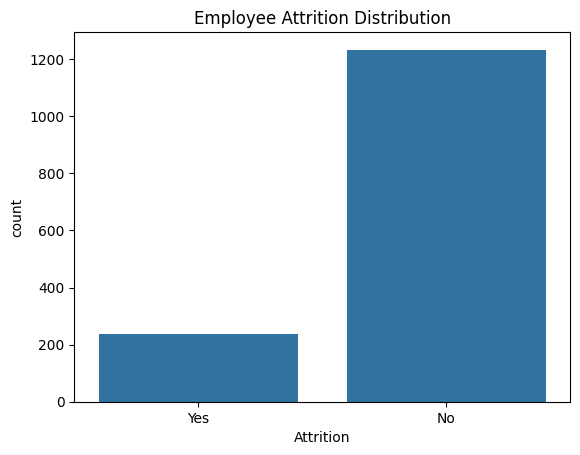

In [16]:
#Value Counts of Target Variable
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Distribution")
plt.show()


In [ ]:
#Encode Target Variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


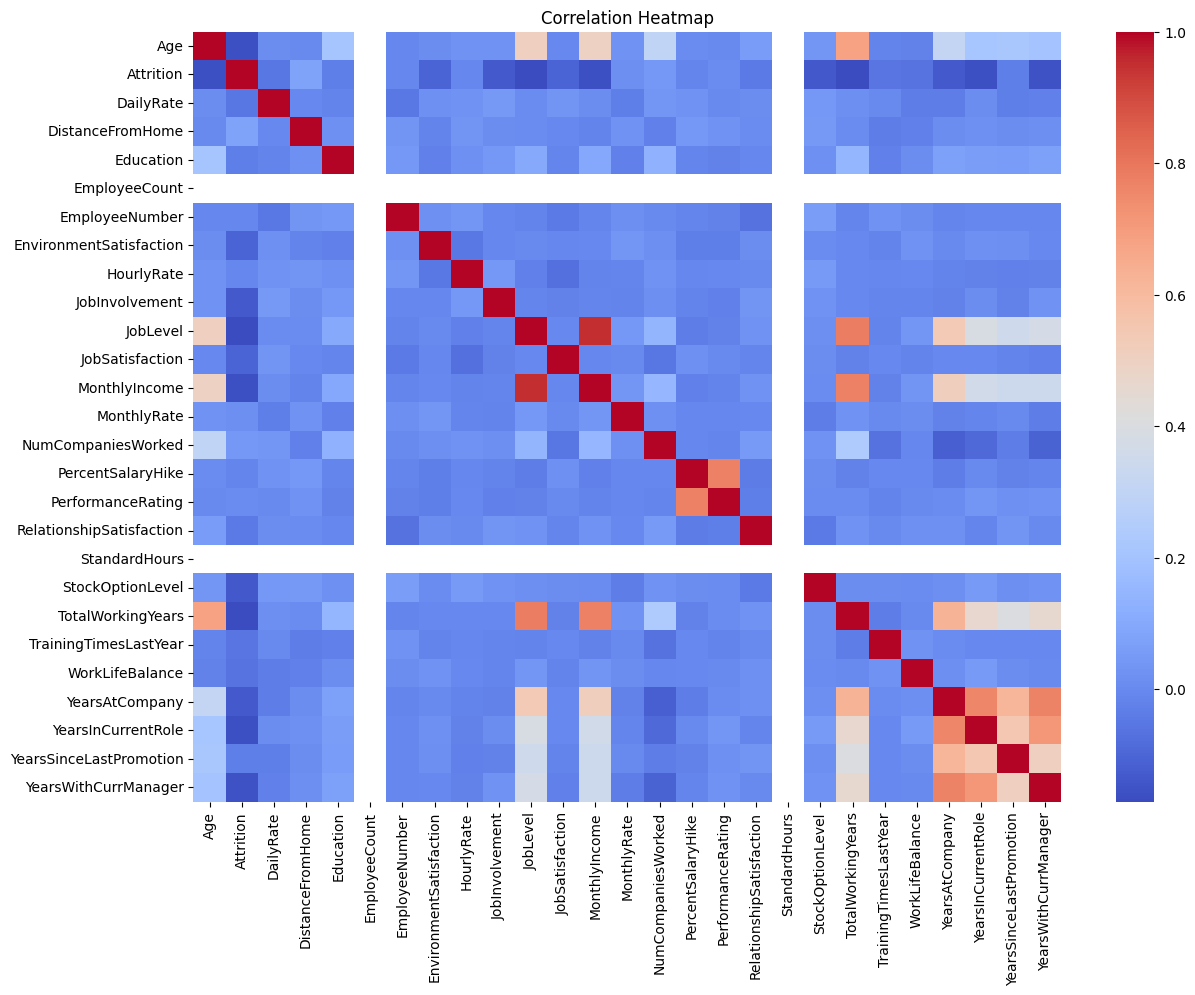

In [22]:
# Correlation Heatmap (only numerical features)
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include='number')  # Keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


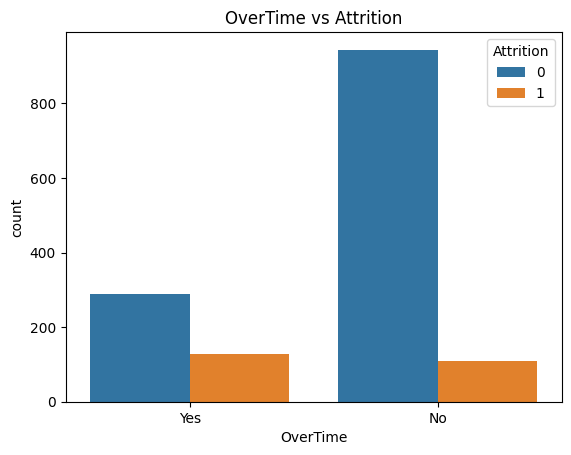

In [23]:
#Categorical vs Attrition (e.g., OverTime)
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.show()

In [24]:
#Select Features (drop identifiers)
X = df.drop(['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']


In [25]:
#One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)


In [29]:
# Model Explanation with SHAP or LIME
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'X' is your features and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Accuracy: 0.8775510204081632
Confusion Matrix:
 [[254   1]
 [ 35   4]]


In [33]:
summary = """
Top Features Influencing Attrition:
- OverTime
- JobSatisfaction
- MonthlyIncome
- EnvironmentSatisfaction

Recommendations:
1. Implement work-life balance programs.
2. Increase employee satisfaction through surveys and workshops.
3. Review compensation for underpaid roles.
4. Focus retention strategies on high-risk groups identified in the model.
"""

print(summary)



Top Features Influencing Attrition:
- OverTime
- JobSatisfaction
- MonthlyIncome
- EnvironmentSatisfaction

Recommendations:
1. Implement work-life balance programs.
2. Increase employee satisfaction through surveys and workshops.
3. Review compensation for underpaid roles.
4. Focus retention strategies on high-risk groups identified in the model.

